## Exercise 2.5 Sutton&Barto

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def run_bandit_non_stationary(eps, 
            max_iter, 
            n_actions, 
            strategy='sample_average', 
            step_size=0.1):
        
    opt_actions_ratio = np.zeros(max_iter)
    rewards = np.zeros(max_iter)
    opt_count = 0

    Q = np.zeros(n_actions)
    N = np.zeros(n_actions)
    q_star = np.zeros(n_actions)

    for i in range(max_iter):
        # select the greedy action with probability 1-eps
        if np.random.random() < 1-eps:
            a = np.argmax(Q)
        # select a random action with probability eps
        else:
            a = np.random.randint(n_actions)

        # make the process non-stationary by changing the expected reward of each action
        q_star += np.random.normal(0, 0.01, n_actions)

        # count the number of correct actions taken
        a_opt = np.argmax(q_star)

        if a == a_opt:
            opt_count += 1

        # calculate the ratio of optimal actions taken
        opt_actions_ratio[i] = opt_count / (i+1)

        # get the reward for the selected action
        reward = np.random.normal(q_star[a], 1)
        # append the reward to the list of rewards
        rewards[i] = reward

        N[a] += 1

        # update the estimate of the expected reward based on the strategy chosen
        if strategy == 'sample_average':
            Q[a] = Q[a] + (reward - Q[a]) / N[a]
        elif strategy == 'constant_step_size':
            Q[a] = Q[a] + step_size * (reward - Q[a])

    return opt_actions_ratio, rewards

In [3]:
runs = 2000
max_iter = 10000
n_actions = 10
eps = [0.1, 0.01]
methods = ['sample_average', 'constant_step_size']

rewards_mtx = np.zeros(shape=(len(methods), len(eps), runs, max_iter))
opt_actions_ratio_mtx = np.zeros(shape=(len(methods), len(eps), runs, max_iter))

for i, method in enumerate(methods):
    for k, e in enumerate(eps):
        for j in range(runs):
            opt_actions_ratio, rewards = run_bandit_non_stationary(e, max_iter, n_actions, strategy=method)
            rewards_mtx[i, k, j] = rewards
            opt_actions_ratio_mtx[i, k, j] = opt_actions_ratio

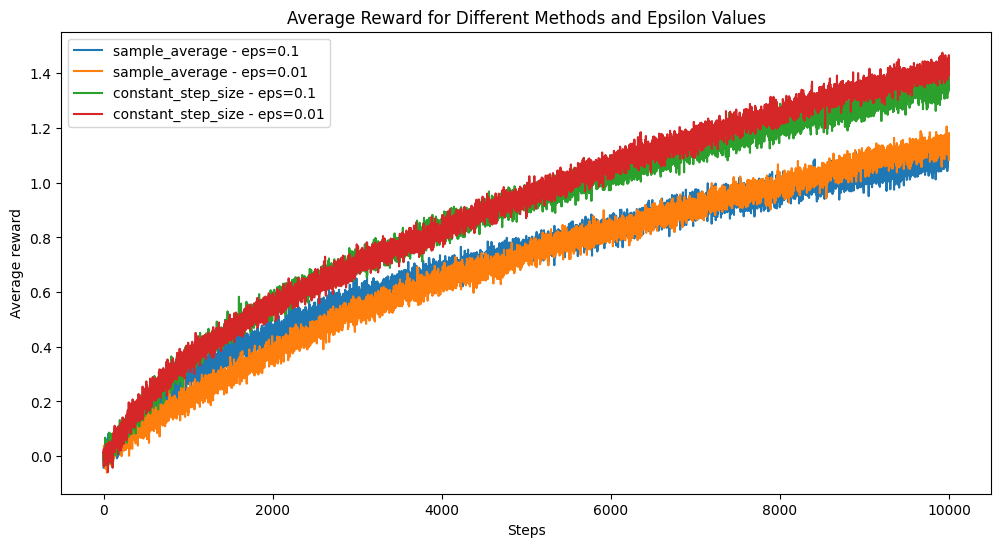

In [4]:
plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    for k, e in enumerate(eps):
        mean_rewards = np.mean(rewards_mtx[i, k], axis=0)
        plt.plot(mean_rewards, label=f'{method} - eps={e}')
        
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Average Reward for Different Methods and Epsilon Values')
plt.legend()
plt.show()

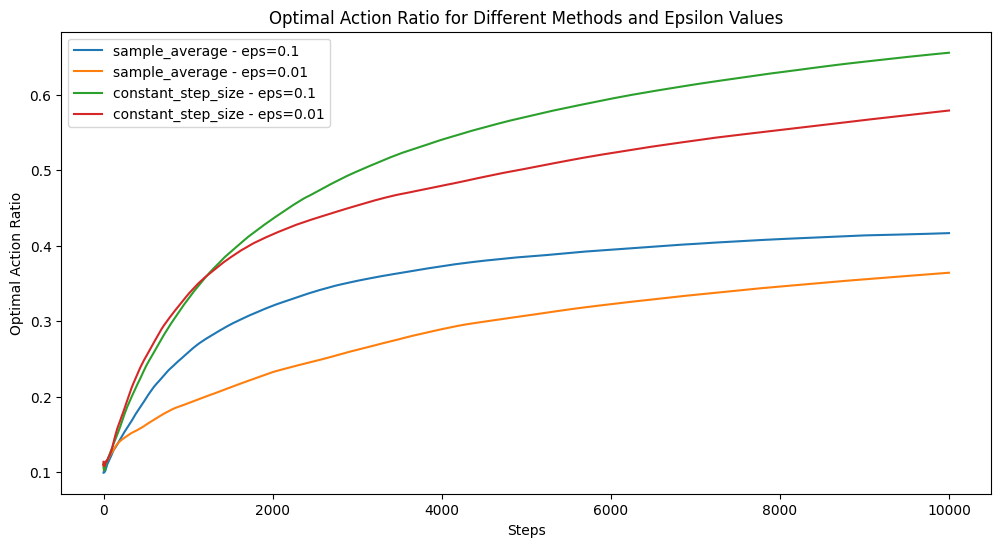

In [6]:
plt.figure(figsize=(12, 6))
for i, method in enumerate(methods):
    for k, e in enumerate(eps):
        mean_opt_actions_ratio = np.mean(opt_actions_ratio_mtx[i, k], axis=0)
        plt.plot(mean_opt_actions_ratio, label=f'{method} - eps={e}')
        
plt.xlabel('Steps')
plt.ylabel('Optimal Action Ratio')
plt.title('Optimal Action Ratio for Different Methods and Epsilon Values')
plt.legend()
plt.show()

When dealing with non-stationary problems, constant step size empirically shows better performance. Also, since we are addressing the non-stationary problem, the best action might change (even at each step), and greater the amount of times it changes heavier the exploration must be. This kind of motivates why a bigger epsilon (0.1) works better in this specific instance.